# ▲CSVファイルの入出力
CSVファイルの入出力について説明します。

参考

- https://docs.python.org/ja/3/library/csv.html

## CSV形式とは

**CSV**形式とは "comma-separated values" の略で、
複数の値をコンマで区切って記録するファイル形式です。

みなさんExcelを使ったことがあると思いますが、
Excelでは一つのセルに一つの値（数値や文字など）が入っていて、
その他のセルの値とは独立に扱えますよね。

それと同じように、CSV形式では、`,`（コンマ）で区切られた要素はそれぞれ独立の値として扱われます。

たとえばサークルのメンバーデータを作ることを考えましょう。
メンバーは「鈴木一郎」と「山田花子」の2名で、
それぞれ『氏名』『ニックネーム』『出身地』を記録しておきたいと思います。

表で表すとこんなデータです。

|ID| 氏名 | ニックネーム | 出身地 | 
|---:|:--------|:---------------|:-------|
|user1| 鈴木一郎 | イチロー | 広島 |
|user2| 山田花子 | はなこ | 名古屋 |

これをCSV形式で表すと次のようになります。

## CSVファイルの読み込み
CSVファイルを読み書きするには、
ファイルをオープンして、そのファイルオブジェクトから、
CSVリーダーを作ります。

**CSVリーダー**とは、CSVファイルからデータを読み込むためのオブジェクトで、
このオブジェクトのメソッドを呼び出すことにより、CSVファイルからデータを読み込むことができます。

CSVリーダーを作るには、
`csv` というモジュールの `csv.reader` という関数にファイルオブジェクトを渡します。

たとえば、次のような表で表されるCSVファイル `small.csv` を読み込んでみましょう。

 0列目 | 1列目 | 2列目 | 3列目 | 4列目 
---|---|---|---|---
 11 | 12 | 13 | 14 | 15 
 21 | 22 | 23 | 24 | 25 
 31 | 32 | 33 | 34 | 35 


In [1]:
import csv
f = open('small.csv', 'r')
dataReader = csv.reader(f)

このオブジェクトもイテレータで、`next` という関数を呼び出すことができます。

In [2]:
next(dataReader)

['11', '12', '13', '14', '15']

このようにして CSVファイルを読むと、
CSVファイルの各行のデータが文字列のリストとなって返されます。

In [3]:
next(dataReader)

['21', '22', '23', '24', '25']

In [4]:
row = next(dataReader)

In [5]:
row

['31', '32', '33', '34', '35']

In [6]:
row[2]

'33'

数値が `''` で囲われている場合、数値ではなく文字列として扱われているので、そのまま計算に使用することができません。

文字列が整数を表す場合、`int` 関数によって文字列を整数に変換することができます。
文字列が小数を含む場合は `float` 関数で浮動小数点数型に変換、文字列が複素数を表す場合は `complex` 関数で複素数に変換します。

In [7]:
int(row[2])

33

ファイルの終わりまで達した後に `next` 関数を実行すると、下のようにエラーが返ってきます。

In [8]:
next(dataReader)

StopIteration: 

ファイルを使い終わったらクローズすることを忘れないようにしましょう。

In [9]:
f.close()

## CSVファイルに対するfor文
CSVリーダーもイテレータですので、for文の `in` の後に書くことができます。

---
```Python
for row in dataReader:
    ...
```
---

繰り返しの各ステップで、`next(dataReader)` が呼び出されて、
`row` にその値が設定され、for文の中身が実行されます。

In [10]:
f = open('small.csv', 'r')
dataReader = csv.reader(f)
for row in dataReader:
    print(row)
f.close()

['11', '12', '13', '14', '15']
['21', '22', '23', '24', '25']
['31', '32', '33', '34', '35']


## CSVファイルに対するwith文
以下はwith文を使った例です。

In [11]:
with open('small.csv', 'r') as f:
    dataReader = csv.reader(f)
    for row in dataReader:
        print(row)

['11', '12', '13', '14', '15']
['21', '22', '23', '24', '25']
['31', '32', '33', '34', '35']


## CSVファイルの書き込み

CSVファイルを作成して書き込むには、CSVライターを作ります。

**CSVライター**とは、CSVファイルを作ってデータを書き込むためのオブジェクトで、
このオブジェクトのメソッドを呼び出すことにより、データがCSV形式でファイルに書き込まれます。

CSVライターを作るには、
`csv` というモジュールの `csv.writer` という関数にファイルオブジェクトを渡します。
ここで、半角英数文字以外の文字（たとえば日本語文字や全角英数文字）を書き込み・書き出しする際には、
文字コード（たとえば `encoding='utf-8'`）を指定し、
また書き出しの際にはさらに改行コードとして `newline=''` を指定しないと文字化けが生じる可能性があります。

In [12]:
f = open('out.csv', 'w', encoding='utf-8', newline='')

In [13]:
dataWriter = csv.writer(f)

In [14]:
dir(dataWriter)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'dialect',
 'writerow',
 'writerows']

In [15]:
dataWriter.writerow([1,2,3])

7

In [16]:
dataWriter.writerow([21,22,23])

10

書き込みモードの場合も、ファイルを使い終わったらクローズすることを忘れないようにしましょう。

In [17]:
f.close()

読み込みのときと同様、with文を使うこともできます。

In [18]:
with open('out.csv', 'w', encoding='utf-8', newline='') as f:
    dataWriter = csv.writer(f)
    dataWriter.writerow([1,2,3])
    dataWriter.writerow([21,22,23])

### 東京の7月の気温
`tokyo-temps.csv` には、気象庁のオープンデータからダウンロードした、
東京の7月の平均気温のデータが入っています。

http://www.data.jma.go.jp/gmd/risk/obsdl/

48行目の第2列に1875年7月の平均気温が入っており、
以下、2016年まで、12行ごとに7月の平均気温が入っています。

以下は、これを取り出すPythonの簡単なコードです。

In [19]:
import csv

with open('tokyo-temps.csv', 'r', encoding='shift_jis') as f:
    dataReader = csv.reader(f) # csvリーダを作成
    n=0
    year = 1875
    years = []
    july_temps = []
    for row in dataReader: # CSVファイルの中身を1行ずつ読み込み
        n = n+1
        if n>=48 and (n-48)%12 == 0: # 48行目からはじめて12か月ごとにif内を実行
            years.append(year)
            july_temps.append(float(row[1]))
            year = year + 1

ファイルをオープンするときに、キーワード引数の `encoding` が指定されています。
このファイルはShift_JISという文字コードで書かれているため、
この引数で、ファイルの符号（**文字コード**）を指定します。
`'shift_jis'` はShift_JISを意味します。この他に、`'utf-8'`（UTF-8、すなわちビットのUnicode）があります。

変数 `years` に年の配列、変数 `july_temps` に対応する年の7月の平均気温の配列が設定されます。

In [20]:
years

[1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [21]:
july_temps

[26.0,
 24.3,
 26.5,
 26.0,
 26.1,
 24.2,
 24.0,
 24.2,
 23.7,
 23.4,
 23.1,
 25.0,
 23.6,
 24.5,
 23.4,
 23.5,
 24.9,
 25.7,
 25.3,
 26.8,
 22.1,
 24.1,
 22.9,
 25.9,
 23.2,
 22.8,
 22.1,
 21.8,
 23.2,
 24.8,
 23.3,
 23.5,
 22.7,
 22.1,
 24.3,
 23.0,
 24.5,
 24.3,
 23.3,
 25.5,
 24.2,
 23.9,
 25.7,
 26.0,
 23.6,
 26.1,
 24.3,
 25.0,
 24.0,
 26.1,
 23.2,
 24.6,
 26.0,
 23.4,
 25.9,
 26.3,
 21.8,
 25.7,
 26.6,
 23.9,
 24.3,
 24.9,
 26.3,
 25.0,
 26.5,
 26.9,
 23.7,
 27.5,
 25.1,
 25.6,
 22.0,
 26.2,
 25.7,
 26.0,
 25.3,
 26.5,
 24.3,
 24.3,
 24.7,
 22.3,
 27.6,
 24.2,
 24.4,
 24.9,
 26.1,
 25.8,
 27.4,
 25.1,
 25.7,
 25.5,
 24.2,
 24.4,
 26.3,
 24.7,
 25.0,
 25.4,
 25.8,
 25.2,
 26.1,
 23.4,
 25.6,
 23.9,
 25.8,
 27.8,
 25.2,
 23.8,
 26.3,
 23.1,
 23.8,
 26.2,
 26.3,
 23.9,
 27.0,
 22.4,
 24.1,
 25.7,
 26.7,
 25.5,
 22.5,
 28.3,
 26.4,
 26.2,
 26.6,
 25.3,
 25.9,
 27.7,
 28.5,
 28.0,
 22.8,
 28.5,
 25.6,
 25.6,
 24.4,
 27.0,
 26.3,
 28.0,
 27.3,
 26.4,
 27.3,
 26.8,
 26.2,
 25.4]

ここでは詳しく説明しませんが、**線形回帰**によるフィッティングを行ってみましょう。

In [22]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

fitp = numpy.poly1d(numpy.polyfit(years, july_temps, 1))
ma = max(years)
mi = min(years)
xp = numpy.linspace(mi, ma, (ma - mi))

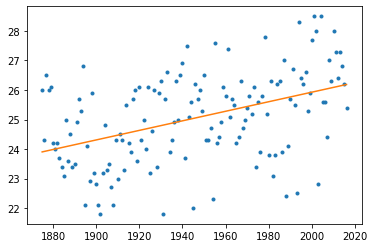

In [23]:
plt.plot(years, july_temps, '.', xp, fitp(xp), '-')
plt.show()

## 練習

1. `tokyo-temps.csv` を読み込んで、各行が西暦年と7月の気温のみからなる `'tokyo-july-temps.csv'` という名前のCSVファイルを作成してください。<br>
西暦年は1875から2016までとします。

2. 作成したCSVファイルをExcelで読み込むとどうなるか確認してください。

以下のセルによってテストしてください。（`years` と `july_temps` の値がそのままと仮定しています。）

In [24]:
with open('tokyo-july-temps.csv', 'r', encoding='shift_jis') as f:
    i = 0
    dataReader = csv.reader(f)
    for row in dataReader:
        if int(row[0]) != years[i] or abs(float(row[1])-july_temps[i])>0.000001:
            print('error', int(row[0]), float(row[1]))
        i += 1
print(i== 142) # 1875年から2016年まで142年間分のデータがあるはずです

True


## 練習

整数データのみからなるCSVファイルの名前を受け取ると、そのCSVファイルの各行を読み込んで整数のリストを作り、
ファイル全体の内容を、そのようなリストのリストとして返す関数 `csv_matrix(name)` を定義してください。

たとえば上で用いた `small.csv` には次のようなデータが入っています。


 0列目 | 1列目 | 2列目 | 3列目 | 4列目 
---|---|---|---|---
 11 | 12 | 13 | 14 | 15 
 21 | 22 | 23 | 24 | 25 
 31 | 32 | 33 | 34 | 35 

この `small.csv` の名前が引数として与えられた場合、

```Python
[[11, 12, 13, 14, 15], [21, 22, 23, 24, 25], [31, 32, 33, 34, 35]]
```

というリストを返します。

In [25]:
def csv_matrix(name):
    ...

以下のセルによってテストしてください。

In [26]:
print(csv_matrix('small.csv') == [[11, 12, 13, 14, 15], [21, 22, 23, 24, 25], [31, 32, 33, 34, 35]])

False


## 練習の解答

In [27]:
with open('tokyo-july-temps.csv', 'w', encoding='utf-8', newline='') as f:
    i = 0
    dataWriter = csv.writer(f)
    for i in range(len(years)):
        dataWriter.writerow([years[i],july_temps[i]])

In [28]:
def csv_matrix(name):
    rows = []
    with open(name, 'r') as f:
        dataReader = csv.reader(f)
        for row in dataReader:
            rows.append([int(x) for x in row])
    return rows    